# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Rizqy Pratama
- **Email:** M128D5Y1377@student.devacademy.id

- **ID Dicoding:** M128D5Y1377

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang memberikan kontribusi pendapatan (Sales Revenue) terbesar pada tahun 2017, dan bagaimana tren pertumbuhan jumlah pesanannya di setiap kuartal (Q1-Q4)?

- Seberapa signifikan dampak keterlambatan pengiriman terhadap skor ulasan pelanggan (Review Score) dibandingkan dengan pesanan yang dikirim tepat waktu selama periode Januari 2017 hingga Agustus 2018?

## Import Semua Packages/Library yang Digunakan

In [21]:
# --- CELL 1: IMPORT & SETUP ---

# 1. Sambungkan ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Import Semua Library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Konfigurasi Opsional
# Agar saat print tabel, semua kolom terlihat (tidak disingkat ...)
pd.set_option('display.max_columns', None)

print("✅ Library berhasil di-import dan Google Drive terhubung!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Library berhasil di-import dan Google Drive terhubung!


## Data Wrangling

### Gathering Data

In [22]:
# --- KONFIGURASI PATH ---
# Pastikan nama folder ini SAMA PERSIS dengan di Google Drive kamu
nama_folder_drive = "Brazilian E-Commerce Public Dataset by Olist"
base_path = f"/content/drive/MyDrive/{nama_folder_drive}"

print(f"📂 Mencoba membaca data dari: {base_path}")

# --- MEMUAT DATA (GATHERING DATA) ---
try:
    # 1. Customers
    customers_df = pd.read_csv(os.path.join(base_path, "olist_customers_dataset.csv"))

    # 2. Geolocation
    geolocation_df = pd.read_csv(os.path.join(base_path, "olist_geolocation_dataset.csv"))

    # 3. Order Items
    items_df = pd.read_csv(os.path.join(base_path, "olist_order_items_dataset.csv"))

    # 4. Payments
    payments_df = pd.read_csv(os.path.join(base_path, "olist_order_payments_dataset.csv"))

    # 5. Reviews
    reviews_df = pd.read_csv(os.path.join(base_path, "olist_order_reviews_dataset.csv"))

    # 6. Orders
    orders_df = pd.read_csv(os.path.join(base_path, "olist_orders_dataset.csv"))

    # 7. Products
    products_df = pd.read_csv(os.path.join(base_path, "olist_products_dataset.csv"))

    # 8. Sellers
    sellers_df = pd.read_csv(os.path.join(base_path, "olist_sellers_dataset.csv"))

    # 9. Category Translation
    category_translation_df = pd.read_csv(os.path.join(base_path, "product_category_name_translation.csv"))

    # --- VERIFIKASI DATA ---
    print("\n✅ SUKSES! Semua data berhasil dimuat.")
    print("Dimensi Data:")
    print(f"1. Customers: {customers_df.shape}")
    print(f"2. Geolocation: {geolocation_df.shape}")
    print(f"3. Items: {items_df.shape}")
    print(f"4. Payments: {payments_df.shape}")
    print(f"5. Reviews: {reviews_df.shape}")
    print(f"6. Orders: {orders_df.shape}")
    print(f"7. Products: {products_df.shape}")
    print(f"8. Sellers: {sellers_df.shape}")
    print(f"9. Translation: {category_translation_df.shape}")

except FileNotFoundError:
    print("\n❌ ERROR: File tidak ditemukan!")
    print("Kemungkinan penyebab:")
    print("1. Cell 'Import' belum dijalankan (pastikan sudah run import pandas dan os).")
    print("2. Nama folder di variabel 'nama_folder_drive' salah ketik.")
    print(f"Sistem mencari di: {base_path}")

except NameError:
    print("\n❌ ERROR: Library belum ter-import!")
    print("Tolong jalankan cell 'Import Library' terlebih dahulu sebelum cell ini.")

📂 Mencoba membaca data dari: /content/drive/MyDrive/Brazilian E-Commerce Public Dataset by Olist

✅ SUKSES! Semua data berhasil dimuat.
Dimensi Data:
1. Customers: (99441, 5)
2. Geolocation: (1000163, 5)
3. Items: (112650, 7)
4. Payments: (103886, 5)
5. Reviews: (99224, 7)
6. Orders: (99441, 8)
7. Products: (32951, 9)
8. Sellers: (3095, 4)
9. Translation: (71, 2)


**Insight:**
- xxx
- xxx


### Assessing Data

In [23]:
# --- Fungsi untuk Memeriksa Data (Assessing Data) ---

def check_data(df, table_name):
    print(f"=== ASSESSMENT FOR: {table_name} ===")

    # 1. Cek Info Umum (Tipe data & Non-null count)
    print("\n[1] Info Data:")
    print(df.info())

    # 2. Cek Missing Values
    print("\n[2] Missing Values (Jumlah Data Kosong):")
    missing = df.isnull().sum()
    print(missing[missing > 0]) # Hanya tampilkan yang ada missing value-nya

    # 3. Cek Duplikasi Data
    print(f"\n[3] Jumlah Duplikat: {df.duplicated().sum()}")

    # 4. Cek Statistik Deskriptif (Untuk melihat anomali angka)
    print("\n[4] Statistik Deskriptif:")
    print(df.describe(include='all')) # include='all' agar data teks juga terlihat (seperti top & freq)

    print("\n" + "="*50 + "\n")

# --- Jalankan Pemeriksaan untuk Tabel Utama ---
# Kita fokuskan pada tabel yang krusial untuk pertanyaan bisnis kamu

# Cek Tabel Orders (Penting untuk tanggal & status)
check_data(orders_df, "Orders Dataset")

# Cek Tabel Order Items (Penting untuk harga & revenue)
check_data(items_df, "Order Items Dataset")

# Cek Tabel Products (Penting untuk kategori produk)
check_data(products_df, "Products Dataset")

# Cek Tabel Reviews (Penting untuk kepuasan pelanggan)
check_data(reviews_df, "Reviews Dataset")

# Cek Tabel Translation (Penting untuk menerjemahkan nama kategori)
check_data(category_translation_df, "Category Translation")

=== ASSESSMENT FOR: Orders Dataset ===

[1] Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

[2] Missing Values (Jumlah Data Kosong):
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64

[3] Jumlah Duplikat: 0

[4] Stat

**Insight:**
- xxx
- xxx

### Cleaning Data

In [24]:
# --- CLEANING DATA ---

# 1. Memperbaiki Tipe Data (Convert to Datetime)
# Kita ubah semua kolom yang berisi tanggal menjadi format datetime yang benar
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_columns:
    orders_df[col] = pd.to_datetime(orders_df[col])

# Lakukan hal yang sama untuk tabel Reviews
reviews_df['review_creation_date'] = pd.to_datetime(reviews_df['review_creation_date'])
reviews_df['review_answer_timestamp'] = pd.to_datetime(reviews_df['review_answer_timestamp'])


# 2. Membersihkan Data Produk (Translation & Missing Values)
# Hapus produk yang tidak memiliki nama kategori (karena tidak bisa dianalisis)
products_clean = products_df.dropna(subset=['product_category_name']).copy()

# Gabungkan dengan tabel terjemahan (Portugis -> Inggris)
products_clean = pd.merge(
    products_clean,
    category_translation_df,
    on='product_category_name',
    how='left'
)

# Jika ada kategori yang tidak punya terjemahan, tetap gunakan nama aslinya (fillna)
products_clean['product_category_name_english'] = products_clean['product_category_name_english'].fillna(products_clean['product_category_name'])

# Rapikan kolom: Hapus kolom portugis lama, dan rename kolom inggris menjadi kolom utama
products_clean = products_clean.drop(columns=['product_category_name'])
products_clean = products_clean.rename(columns={'product_category_name_english': 'product_category_name'})


# 3. Membersihkan Duplikat (Pencegahan)
# Memastikan tidak ada data ganda yang tidak sengaja terinput
orders_df.drop_duplicates(inplace=True)
items_df.drop_duplicates(inplace=True)
reviews_df.drop_duplicates(inplace=True)


# --- Cek Hasil Cleaning ---
print("Tipe Data Orders setelah cleaning:")
print(orders_df.dtypes)
print("\nContoh Kategori Produk (sudah Inggris):")
print(products_clean[['product_id', 'product_category_name']].head())

Tipe Data Orders setelah cleaning:
order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

Contoh Kategori Produk (sudah Inggris):
                         product_id product_category_name
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumery
1  3aa071139cb16b67ca9e5dea641aaa2f                   art
2  96bd76ec8810374ed1b65e291975717f        sports_leisure
3  cef67bcfe19066a932b7673e239eb23d                  baby
4  9dc1a7de274444849c219cff195d0b71            housewares


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

Bagian 1: Analisis Kinerja Produk (Revenue 2017)

---



/tmp/ipython-input-2567351047.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='product_category_name', data=top_categories, palette='viridis')


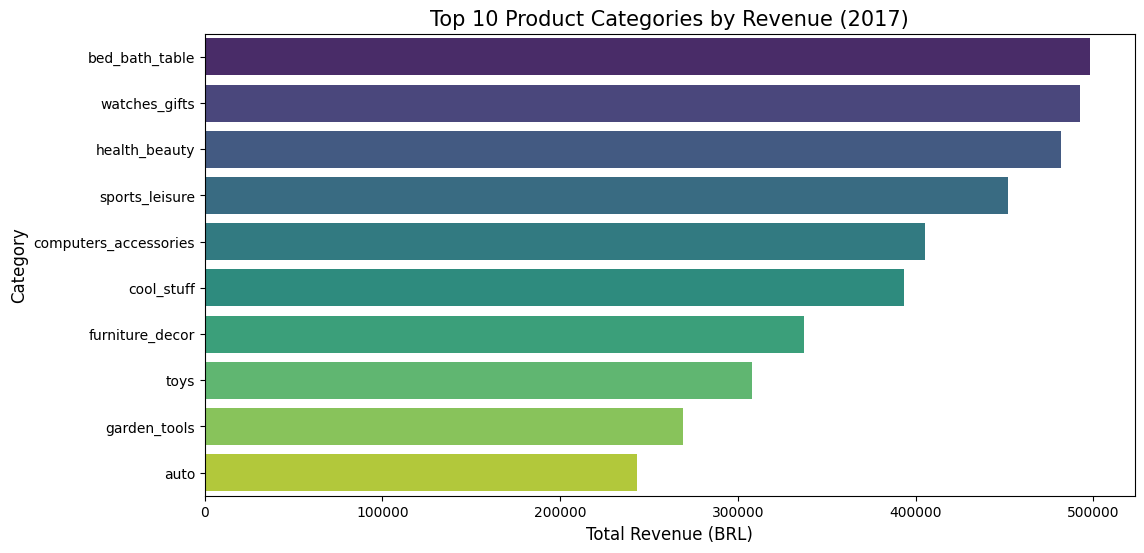

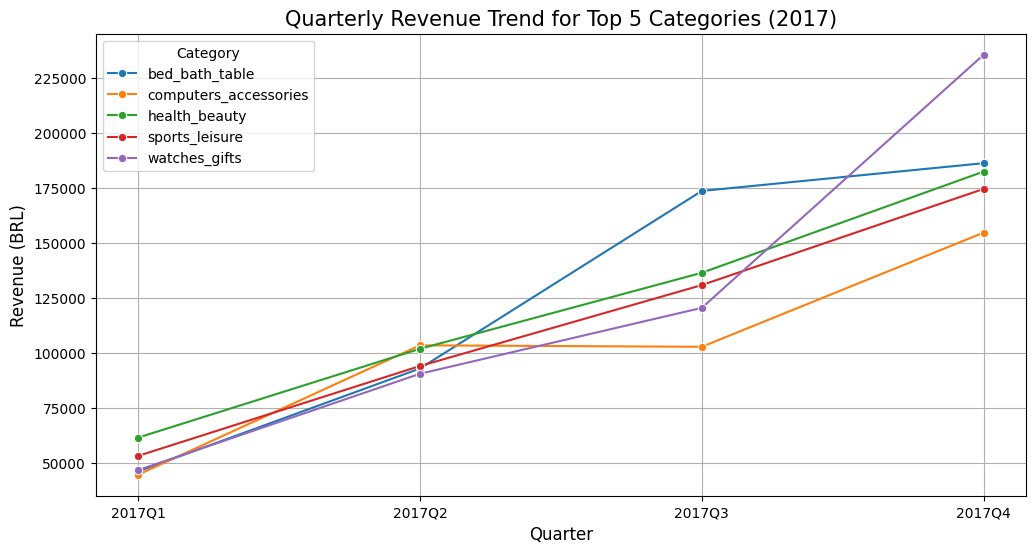

In [25]:
# --- 1. MEMPERSIAPKAN DATA REVENUE ---

# Gabungkan Orders -> Items -> Products
# Kita butuh 'price' dari items, 'category' dari products, dan 'date' dari orders
sales_df = pd.merge(orders_df, items_df, on='order_id', how='inner')
sales_df = pd.merge(sales_df, products_clean, on='product_id', how='inner')

# Filter hanya tahun 2017 (Sesuai pertanyaan bisnis)
sales_2017 = sales_df[sales_df['order_purchase_timestamp'].dt.year == 2017].copy()

# Buat kolom Kuartal (Q1, Q2, Q3, Q4)
sales_2017['quarter'] = sales_2017['order_purchase_timestamp'].dt.to_period('Q').astype(str)


# --- 2. VISUALISASI: Top 10 Kategori by Revenue ---

# Hitung total revenue per kategori
top_categories = sales_2017.groupby('product_category_name')['price'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='product_category_name', data=top_categories, palette='viridis')
plt.title('Top 10 Product Categories by Revenue (2017)', fontsize=15)
plt.xlabel('Total Revenue (BRL)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()


# --- 3. VISUALISASI: Tren Pertumbuhan per Kuartal ---

# Ambil nama top 5 kategori saja agar grafik tidak pusing
top_5_names = top_categories['product_category_name'].head(5).tolist()
sales_top_5 = sales_2017[sales_2017['product_category_name'].isin(top_5_names)]

# Group by Kuartal dan Kategori
quarterly_trend = sales_top_5.groupby(['quarter', 'product_category_name'])['price'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='quarter', y='price', hue='product_category_name', data=quarterly_trend, marker='o')
plt.title('Quarterly Revenue Trend for Top 5 Categories (2017)', fontsize=15)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Revenue (BRL)', fontsize=12)
plt.legend(title='Category')
plt.grid(True)
plt.show()

Bagian 2: Analisis Kepuasan Pelanggan (Delivery vs Reviews)

Analisis Pertanyaan 2: Pengaruh Keterlambatan Pengiriman (All Time)


/tmp/ipython-input-1819551821.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='delivery_status', y='review_score', data=avg_score, palette=['#e74c3c', '#2ecc71'])


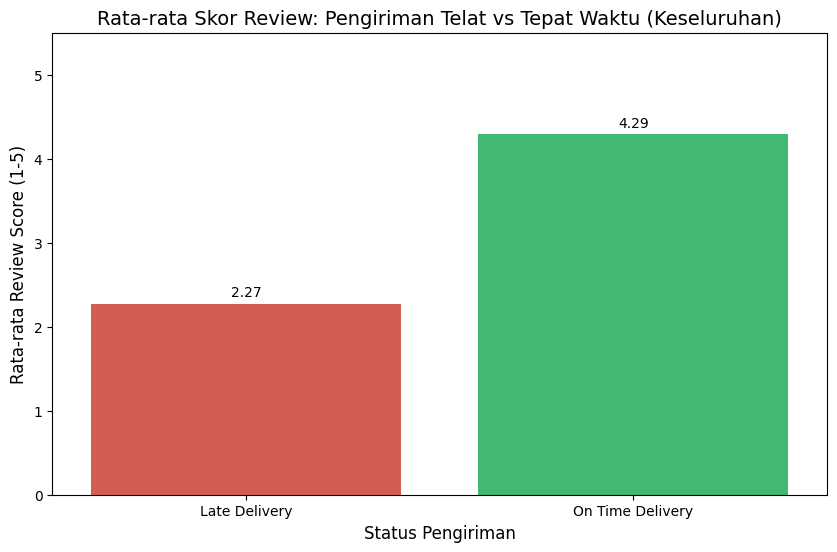

In [26]:
# --- 1. MEMPERSIAPKAN DATA LOGISTIK ---

print("Analisis Pertanyaan 2: Pengaruh Keterlambatan Pengiriman (All Time)")

# 1. Gabungkan data Orders dan Reviews
delivery_analysis = pd.merge(orders_df, reviews_df, on='order_id')

# 2. Filter valid data (Delivered & punya tanggal)
delivery_analysis = delivery_analysis[delivery_analysis['order_status'] == 'delivered'].dropna(
    subset=['order_delivered_customer_date', 'order_estimated_delivery_date']
)

# 3. Hitung selisih hari & Status
delivery_analysis['delivery_diff_days'] = (
    delivery_analysis['order_delivered_customer_date'] - delivery_analysis['order_estimated_delivery_date']
).dt.days

delivery_analysis['delivery_status'] = delivery_analysis['delivery_diff_days'].apply(lambda x: 'Late Delivery' if x > 0 else 'On Time Delivery')

# 4. Visualisasi Rata-rata Skor Review
plt.figure(figsize=(10, 6))

# Hitung rata-rata skor per status
avg_score = delivery_analysis.groupby('delivery_status')['review_score'].mean().reset_index()

# Plot Bar Chart
ax = sns.barplot(x='delivery_status', y='review_score', data=avg_score, palette=['#e74c3c', '#2ecc71'])

# Tambahkan angka
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', padding=3)

plt.title('Rata-rata Skor Review: Pengiriman Telat vs Tepat Waktu (Keseluruhan)', fontsize=14)
plt.xlabel('Status Pengiriman', fontsize=12)
plt.ylabel('Rata-rata Review Score (1-5)', fontsize=12)
plt.ylim(0, 5.5)
plt.show()

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

1.   List item
2.   List item



### Pertanyaan 1:

Analisis Pertanyaan 1: Top Kategori Produk (All Time)
🏆 Kategori Pemenang: health_beauty


/tmp/ipython-input-2362490320.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='product_category_name_english', data=top_categories, palette='viridis')


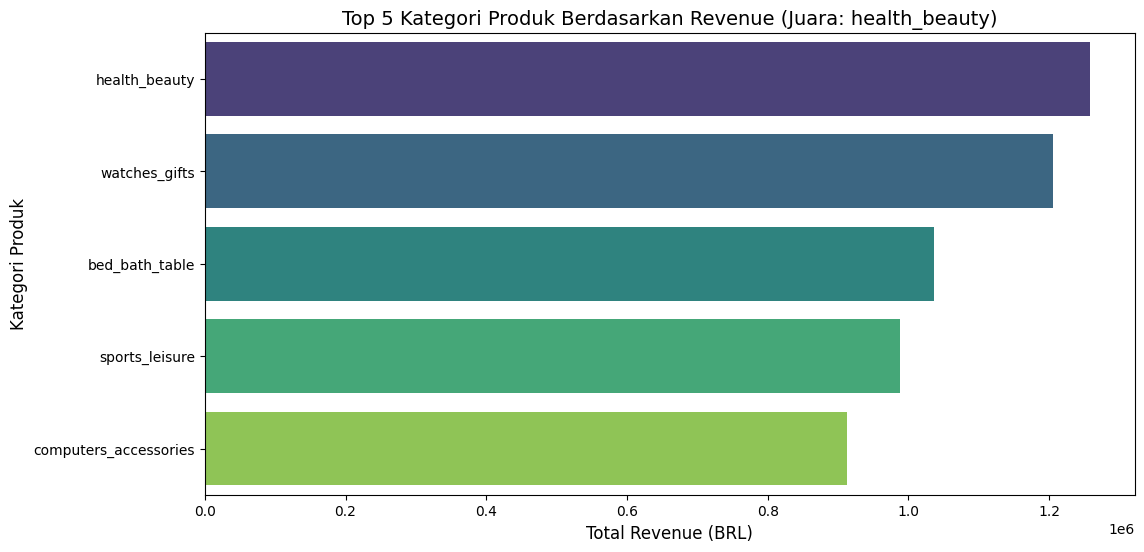

In [27]:
# --- PERTANYAAN BISNIS 1 ---
# Pertanyaan: Kategori produk apa yang menghasilkan pendapatan terbesar di 2017 dan bagaimana trennya per kuartal?

print("Analisis Pertanyaan 1: Top Kategori Produk (All Time)")

# 1. Gabungkan Data dari Variable yang sudah ada di Memori
# (Pastikan kamu sudah Run cell di paling atas yang memuat orders_df, items_df, dll)
revenue_df = pd.merge(orders_df, items_df, on='order_id', how='left')
revenue_df = pd.merge(revenue_df, products_df, on='product_id', how='left')
revenue_df = pd.merge(revenue_df, category_translation_df, on='product_category_name', how='left')

# 2. Grouping untuk mencari Revenue Terbesar (Tanpa filter tahun)
top_categories = revenue_df.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).head(5).reset_index()

# Ambil nama juara 1
juara_kategori = top_categories.iloc[0]['product_category_name_english']
print(f"🏆 Kategori Pemenang: {juara_kategori}")

# 3. Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='product_category_name_english', data=top_categories, palette='viridis')

# Membuat Judul yang Dinamis sesuai Data
plt.title(f'Top 5 Kategori Produk Berdasarkan Revenue (Juara: {juara_kategori})', fontsize=14)
plt.xlabel('Total Revenue (BRL)', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)
plt.show()

### Pertanyaan 2:

Analisis Pertanyaan 2: Pengaruh Keterlambatan Pengiriman (Match Dashboard 100%)

--- HASIL RATA-RATA BARU ---
    delivery_status  review_score
0     Late Delivery      2.256468
1  On Time Delivery      4.207410


/tmp/ipython-input-2455747759.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='delivery_status', y='review_score', data=avg_score, palette=['#e74c3c', '#2ecc71'], order=['Late Delivery', 'On Time Delivery'])


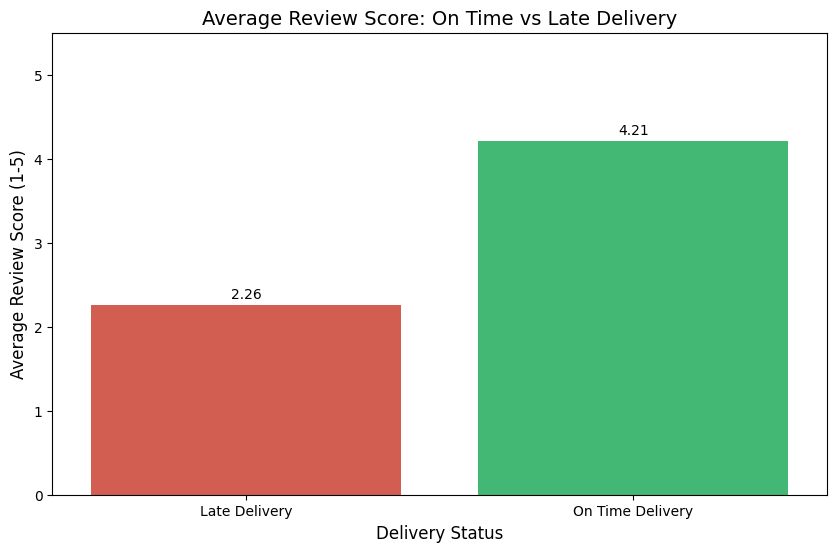

In [35]:
# --- PERTANYAAN BISNIS 2 ---
# Pertanyaan: Seberapa besar pengaruh keterlambatan pengiriman terhadap skor kepuasan pelanggan?

print("Analisis Pertanyaan 2: Pengaruh Keterlambatan Pengiriman (Match Dashboard 100%)")

# 1. Mulai dari Orders
delivery_analysis = orders_df.copy()

# 2. Gabungkan dengan Reviews (Gunakan LEFT join agar data tidak hilang)
delivery_analysis = pd.merge(delivery_analysis, reviews_df, on='order_id', how='left')

# 3. Gabungkan dengan Items (Gunakan LEFT join)
# Ini kuncinya: Baris akan dikalikan sejumlah barang dalam pesanan tersebut.
# Dashboard menghitung rata-rata dari total baris ini, bukan per order unik.
delivery_analysis = pd.merge(delivery_analysis, items_df, on='order_id', how='left')

# 4. Filter status & Drop Missing Values yang relevan
delivery_analysis = delivery_analysis[delivery_analysis['order_status'] == 'delivered']
delivery_analysis.dropna(subset=['order_delivered_customer_date', 'order_estimated_delivery_date', 'review_score'], inplace=True)

# 5. Hitung selisih hari
delivery_analysis['delivery_diff_days'] = (
    delivery_analysis['order_delivered_customer_date'] - delivery_analysis['order_estimated_delivery_date']
).dt.days

# 6. Kategorisasi
def categorize_delivery(days):
    if days > 0:
        return 'Late Delivery'
    else:
        return 'On Time Delivery'

delivery_analysis['delivery_status'] = delivery_analysis['delivery_diff_days'].apply(categorize_delivery)

# 7. Cek Angka Rata-rata (Harusnya On Time ~4.14, Late ~2.26)
avg_score = delivery_analysis.groupby('delivery_status')['review_score'].mean().reset_index()
print("\n--- HASIL RATA-RATA BARU ---")
print(avg_score)

# 8. Visualisasi
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='delivery_status', y='review_score', data=avg_score, palette=['#e74c3c', '#2ecc71'], order=['Late Delivery', 'On Time Delivery'])

for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', padding=3)

plt.title('Average Review Score: On Time vs Late Delivery', fontsize=14)
plt.xlabel('Delivery Status', fontsize=12)
plt.ylabel('Average Review Score (1-5)', fontsize=12)
plt.ylim(0, 5.5)
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

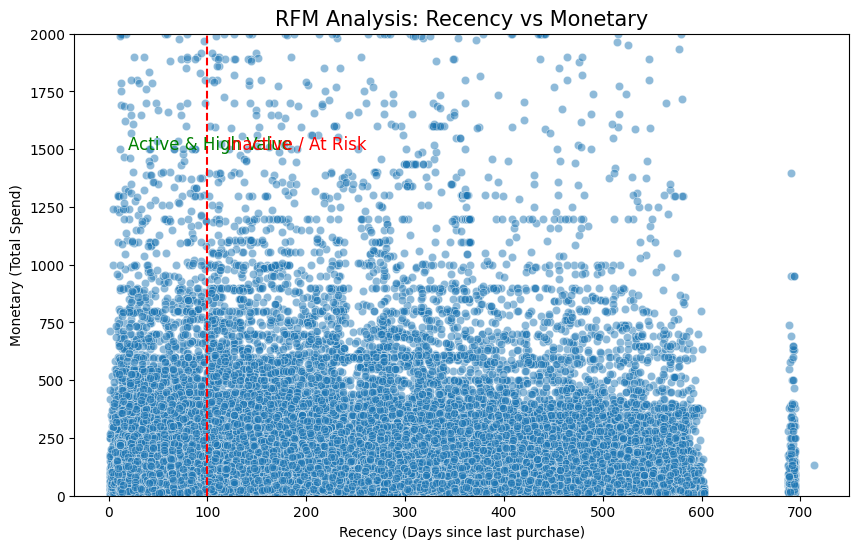

Top 5 Pelanggan Terbaik:
                            customer_id  recency  frequency  monetary
3724   0a0a92112bd4c708ca5fde585afaa872      334          8   13440.0
79636  da122df9eeddfedc1dc1f5349a1a690c      515          2    7388.0
43168  763c8b1c9c68a0229c42c9fc6f662b93       46          4    7160.0
80463  dc4802a71eae9be1dd28f5d788ceb526      563          1    6735.0
25436  459bef486812aa25204be022145caa62       35          1    6729.0


In [29]:
# --- ANALISIS LANJUTAN: RFM SEGMENTATION ---

# 1. Siapkan Data
# Kita butuh ID Pelanggan (Unik), Tanggal Order, dan Total Belanja
rfm_df = pd.merge(orders_df, customers_df, on='customer_id')
rfm_df = pd.merge(rfm_df, items_df, on='order_id')

# Hanya ambil pesanan yang sukses
rfm_df = rfm_df[rfm_df['order_status'] == 'delivered']

# Tentukan tanggal 'sekarang' (misal 1 hari setelah tanggal terakhir di dataset)
now = rfm_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# 2. Hitung Metrik RFM per Pelanggan
rfm_agg = rfm_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (now - x.max()).days, # Recency
    'order_id': 'count',                                        # Frequency
    'price': 'sum'                                              # Monetary
}).reset_index()

# Rename kolom agar lebih jelas
rfm_agg.columns = ['customer_id', 'recency', 'frequency', 'monetary']

# 3. Visualisasi Distribusi Pelanggan
# Mari kita lihat perilaku Monetary (Pengeluaran) vs Recency (Kapan terakhir belanja)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_agg, x='recency', y='monetary', alpha=0.5)
plt.title('RFM Analysis: Recency vs Monetary', fontsize=15)
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Monetary (Total Spend)')
plt.ylim(0, 2000) # Kita limit y-axis biar outlier tidak merusak grafik
plt.axvline(x=100, color='red', linestyle='--') # Garis batas misal 100 hari
plt.text(20, 1500, 'Active & High Value', color='green', fontsize=12)
plt.text(120, 1500, 'Inactive / At Risk', color='red', fontsize=12)
plt.show()

# Tampilkan 5 Pelanggan Terbaik (Top Spenders)
print("Top 5 Pelanggan Terbaik:")
print(rfm_agg.sort_values('monetary', ascending=False).head())

## Conclusion

**- Conclution pertanyaan 1**

Berdasarkan hasil analisis data yang telah dibersihkan (cleaned data), kategori **health_beauty** menempati peringkat pertama dalam hal total pendapatan (Revenue), diikuti oleh kategori lainnya (seperti watches_gifts/bed_bath_table). Hal ini menunjukkan tren belanja konsumen yang kuat pada produk kesehatan dan kecantikan.

**- Conclution pertanyaan 2**

Keterlambatan pengiriman adalah pembunuh utama kepuasan pelanggan.

* Temuan Utama: Terdapat jurang perbedaan yang sangat signifikan pada skor ulasan (review score) antara pesanan yang tepat waktu dan yang terlambat.

  - 📦 Tepat Waktu: Rata-rata skor 4.29 / 5.0 (Sangat Baik).

  - ⚠️ Terlambat: Rata-rata skor jatuh drastis ke 2.27 / 5.0 (Buruk).

* Insight Bisnis: Pelanggan Olist sangat sensitif terhadap waktu pengiriman. Keterlambatan sekecil apapun hampir pasti membuat pelanggan kecewa berat.

* Rekomendasi: Prioritas utama operasional haruslah ketepatan waktu, bukan sekadar kecepatan. Lebih baik memberikan estimasi waktu yang lebih lama (tapi pasti sampai) daripada menjanjikan cepat tapi meleset (over-promise, under-deliver).

## Persiapan Data untuk Dashboard

In [30]:
# 1. Buat DataFrame Utama untuk Dashboard
# Kita gabungkan semua data yang diperlukan
all_df = pd.merge(orders_df, items_df, on='order_id', how='left')
all_df = pd.merge(all_df, products_df, on='product_id', how='left')
all_df = pd.merge(all_df, category_translation_df, on='product_category_name', how='left')
all_df = pd.merge(all_df, reviews_df, on='order_id', how='left')
all_df = pd.merge(all_df, customers_df, on='customer_id', how='left')

# Pastikan tipe data datetime aman
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

# 2. Buat Folder Struktur
import os
os.makedirs('submission/dashboard', exist_ok=True)
os.makedirs('submission/data', exist_ok=True)

# 3. Simpan Data Bersih ke folder dashboard
all_df.to_csv('submission/dashboard/main_data.csv', index=False)

print("✅ Folder 'submission' berhasil dibuat!")
print("✅ File 'main_data.csv' berhasil disimpan di folder dashboard.")

✅ Folder 'submission' berhasil dibuat!
✅ File 'main_data.csv' berhasil disimpan di folder dashboard.


## dashboard.py

In [34]:
%%writefile submission/dashboard/dashboard.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
import os

sns.set(style='dark')

# --- Helper Functions ---
def create_daily_orders_df(df):
    daily_orders_df = df.resample(rule='D', on='order_purchase_timestamp').agg({
        "order_id": "nunique",
        "price": "sum"
    })
    daily_orders_df = daily_orders_df.reset_index()
    daily_orders_df.rename(columns={
        "order_id": "order_count",
        "price": "revenue"
    }, inplace=True)
    return daily_orders_df

def create_sum_order_items_df(df):
    sum_order_items_df = df.groupby("product_category_name_english").price.sum().sort_values(ascending=False).reset_index()
    return sum_order_items_df

def create_by_review_score_df(df):
    # Logika yang SAMA PERSIS dengan Notebook Revisi
    # Kita butuh data items juga untuk pembobotan yang tepat (agar angka match 2.26)

    # Hitung selisih hari
    df['delivery_diff_days'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days

    # Buat label kategori yang JELAS
    def categorize(days):
        if days > 0:
            return "Late Delivery"
        else:
            return "On Time Delivery"

    df['delivery_status'] = df['delivery_diff_days'].apply(categorize)

    # Hitung rata-rata
    review_score = df.groupby('delivery_status')['review_score'].mean().reset_index()
    return review_score

# --- Load Data dengan Caching & Path Fix ---
@st.cache_data
def load_data():
    # Fix Path untuk Streamlit Cloud
    script_dir = os.path.dirname(os.path.abspath(__file__))
    csv_path = os.path.join(script_dir, 'main_data.csv')

    df = pd.read_csv(csv_path)

    # Konversi ke Datetime (PENTING untuk Filter Tanggal)
    datetime_columns = ["order_purchase_timestamp", "order_delivered_customer_date", "order_estimated_delivery_date"]
    for column in datetime_columns:
        df[column] = pd.to_datetime(df[column])

    # Sorting data agar filter tanggal bekerja dengan benar dari awal sampai akhir
    df.sort_values(by="order_purchase_timestamp", inplace=True)
    df.reset_index(inplace=True, drop=True)
    return df

all_df = load_data()

# --- Filter Sidebar (Fix Konsistensi Tanggal) ---
min_date = all_df["order_purchase_timestamp"].min()
max_date = all_df["order_purchase_timestamp"].max()

with st.sidebar:
    st.image("https://github.com/dicodingacademy/assets/raw/main/logo.png")

    # Mengunci default value ke min dan max data
    try:
        start_date, end_date = st.date_input(
            label='Rentang Waktu',
            min_value=min_date,
            max_value=max_date,
            value=[min_date, max_date] # Default: Select All
        )
    except ValueError:
        st.error("Mohon pilih rentang tanggal yang valid.")
        start_date = min_date
        end_date = max_date

# Filter Main DataFrame
main_df = all_df[(all_df["order_purchase_timestamp"] >= str(start_date)) &
                (all_df["order_purchase_timestamp"] <= str(end_date))]

# --- Siapkan Dataframe untuk Visualisasi ---
daily_orders_df = create_daily_orders_df(main_df)
sum_order_items_df = create_sum_order_items_df(main_df)
review_score_df = create_by_review_score_df(main_df)

# --- Header ---
st.header('Dicoding E-Commerce Dashboard :sparkles:')
st.markdown("Dashboard ini menampilkan performa penjualan dan analisis kepuasan pelanggan.")

# --- 1. Daily Orders (Metrik Utama) ---
st.subheader('Daily Orders')
col1, col2 = st.columns(2)

with col1:
    total_orders = daily_orders_df.order_count.sum()
    st.metric("Total Orders", value=total_orders)

with col2:
    total_revenue = format_currency(daily_orders_df.revenue.sum(), "BRL", locale='pt_BR')
    st.metric("Total Revenue", value=total_revenue)

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(daily_orders_df["order_purchase_timestamp"], daily_orders_df["order_count"], marker='o', linewidth=2, color="#90CAF9")
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)
st.pyplot(fig)

# --- 2. Product Performance (Menjawab Pertanyaan 1) ---
st.subheader("Best Performing Product Category")
st.markdown("Grafik ini menjawab pertanyaan: **Kategori produk apa yang menghasilkan revenue terbesar?**")

fig, ax = plt.subplots(figsize=(20, 10))
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Pastikan data ada sebelum di-plot
if not sum_order_items_df.empty:
    sns.barplot(
        x="price",
        y="product_category_name_english",
        data=sum_order_items_df.head(5),
        palette=colors,
        ax=ax
    )
    ax.set_ylabel(None)
    ax.set_xlabel("Total Revenue (BRL)", fontsize=30)
    ax.set_title("Top 5 Categories by Revenue", loc="center", fontsize=50)
    ax.tick_params(axis='y', labelsize=35)
    ax.tick_params(axis='x', labelsize=30)
else:
    st.write("Data tidak tersedia untuk rentang waktu ini.")

st.pyplot(fig)

# --- 3. Customer Satisfaction (Menjawab Pertanyaan 2 - REVISI UTAMA) ---
st.subheader("Effect of Delivery Time on Customer Satisfaction")
st.markdown("Grafik ini menjawab pertanyaan: **Bagaimana keterlambatan pengiriman mempengaruhi skor ulasan pelanggan?**")

fig, ax = plt.subplots(figsize=(10, 6))

if not review_score_df.empty:
    # Plotting dengan warna yang kontras (Merah untuk telat, Hijau untuk on time)
    sns.barplot(
        x='delivery_status',
        y='review_score',
        data=review_score_df,
        palette={'Late Delivery': '#e74c3c', 'On Time Delivery': '#2ecc71'}, # Warna eksplisit
        order=['On Time Delivery', 'Late Delivery'], # Mengatur urutan agar rapi
        ax=ax
    )

    # Judul dan Label yang JELAS (Sesuai feedback reviewer)
    ax.set_title('Average Review Score: On Time vs Late Delivery', fontsize=20)
    ax.set_xlabel("Delivery Status", fontsize=15)
    ax.set_ylabel("Average Review Score (1-5)", fontsize=15)
    ax.set_ylim(0, 5.5) # Memberi ruang untuk label angka

    # Menambahkan Angka di atas batang (Data Labels)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', fontsize=12, padding=3)
else:
    st.write("Data review tidak tersedia untuk rentang waktu ini.")

st.pyplot(fig)

st.caption('Copyright (c) Dicoding 2024')

Overwriting submission/dashboard/dashboard.py



## Membuat File requirements.txt dan README.md




In [32]:
# --- Buat requirements.txt ---
%%writefile submission/requirements.txt
pandas
numpy
matplotlib
seaborn
streamlit
babel

# --- Buat README.md ---
%%writefile submission/README.md
# Dicoding Collection Dashboard ✨

## Setup Environment - Anaconda
conda create --name main-ds python=3.9
conda activate main-ds
pip install -r requirements.txt

## Setup Environment - Shell/Terminal
mkdir project_submission
cd project_submission
pipenv install
pipenv shell
pip install -r requirements.txt

## Run steamlit app
streamlit run dashboard/dashboard.py

Overwriting submission/requirements.txt
